In [1]:
import os
import sys
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

cwd = os.getcwd()
sys.path.append(os.path.join(cwd, "work/src"))
from horsetail import horsetail

In [2]:
%%time
result = []
for _ in range(10000):
    result.append(horsetail())

CPU times: user 11.9 s, sys: 38.5 ms, total: 12 s
Wall time: 12 s


In [3]:
%%time
def run_simulation():
    return horsetail()

num_simulations = 10000
num_jobs = -1
results = Parallel(n_jobs=num_jobs)(delayed(run_simulation)() for _ in range(num_simulations))

CPU times: user 383 ms, sys: 123 ms, total: 506 ms
Wall time: 4.14 s


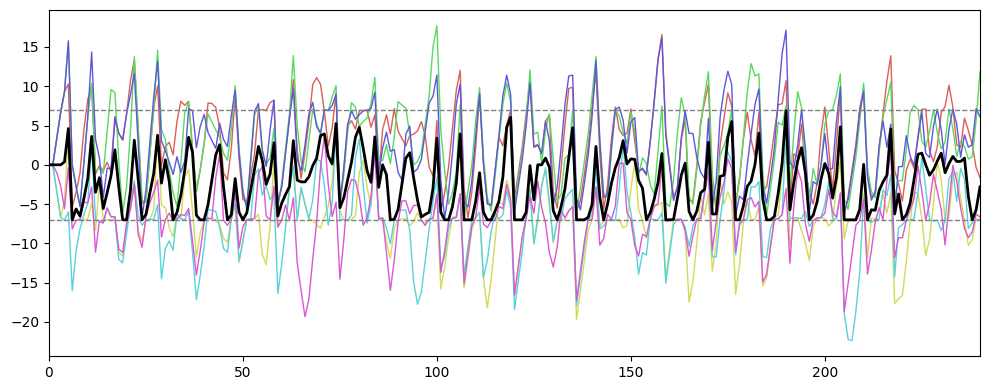

In [4]:
res = horsetail(seed=1)
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(res[:, 0], c="k", lw=2, zorder=10)
c = sns.color_palette("hls", 6)
for i in range(1, 7, 1):
    ax.plot(res[:, i], lw=1, c=c[i - 1])
ax.hlines(y=[-7, 7], xmin=0, xmax=240, linestyle="--", colors="gray", lw=1)
ax.set_xlim(0,240)
plt.tight_layout()
plt.show()